In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("MusicData.csv")

In [3]:
df.tail(10)

,index,Format,Metric,Year,Number of Records,Value (Actual)
2998,2998,Vinyl Single,Value (Adjusted),2010,1,2.696606
2999,2999,Vinyl Single,Value (Adjusted),2011,1,5.228183
3000,3000,Vinyl Single,Value (Adjusted),2012,1,5.281477
3001,3001,Vinyl Single,Value (Adjusted),2013,1,3.269213
3002,3002,Vinyl Single,Value (Adjusted),2014,1,5.938887
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3008 non-null   int64  
 1   Format             3008 non-null   object 
 2   Metric             3008 non-null   object 
 3   Year               3008 non-null   int64  
 4   Number of Records  3008 non-null   int64  
 5   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 141.1+ KB


In [5]:
df.describe()

,index,Year,Number of Records,Value (Actual)
count,3008.00000,3008.000000,3008.0,1351.000000
mean,1503.50000,1996.000000,1.0,781.291237
std,868.47913,13.566915,0.0,2246.837672
min,0.00000,1973.000000,1.0,-7.650944
25%,751.75000,1984.000000,1.0,3.700228
50%,1503.50000,1996.000000,1.0,63.900000
75%,2255.25000,2008.000000,1.0,448.900000
max,3007.00000,2019.000000,1.0,19667.327786


In [6]:
len(df)

3008

In [7]:
df["Format"].nunique()

24

In [8]:
df["Metric"].unique()

array(['Units', 'Value', 'Value (Adjusted)'], dtype=object)

In [9]:
df.head()

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN


In [10]:
yearly_mean = df.groupby("Year")["Value (Actual)"].mean().sort_values(ascending=False).head(5)

In [11]:
yearly_mean

Year
1999    1657.666796
1978    1619.793357
2000    1594.287116
1998    1580.017487
1995    1482.642970
Name: Value (Actual), dtype: float64

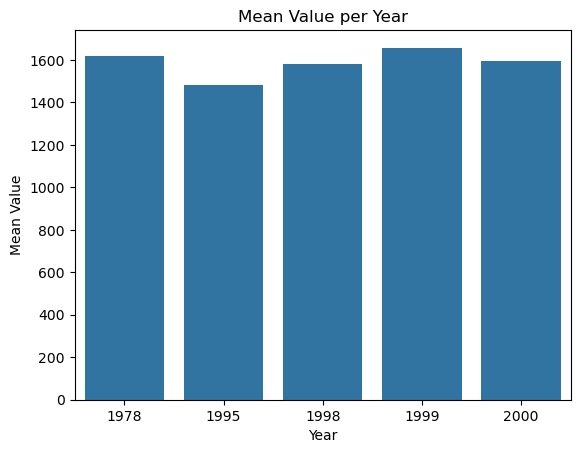

In [12]:
sns.barplot(x = yearly_mean.index, y = yearly_mean.values)
plt.title("Mean Value per Year")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.show()

In [13]:
df["Format"].value_counts().head(3)

Format
CD                       141
DVD Audio                141
Ringtones & Ringbacks    141
Name: count, dtype: int64

In [14]:
df_sorted = df.sort_values("Year")

In [15]:
df_sorted

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1833,1833,Synchronization,Value,1973,1,NaN
2773,2773,Ringtones & Ringbacks,Value (Adjusted),1973,1,NaN
1786,1786,SoundExchange Distributions,Value,1973,1,NaN
611,611,Kiosk,Units,1973,1,NaN
...,...,...,...,...,...,...
1644,1644,Other Tapes,Value,2019,1,NaN
1597,1597,Other Digital,Value,2019,1,21.517175
1550,1550,Other Ad-Supported Streaming,Value,2019,1,251.064710
2161,2161,Cassette Single,Value (Adjusted),2019,1,NaN


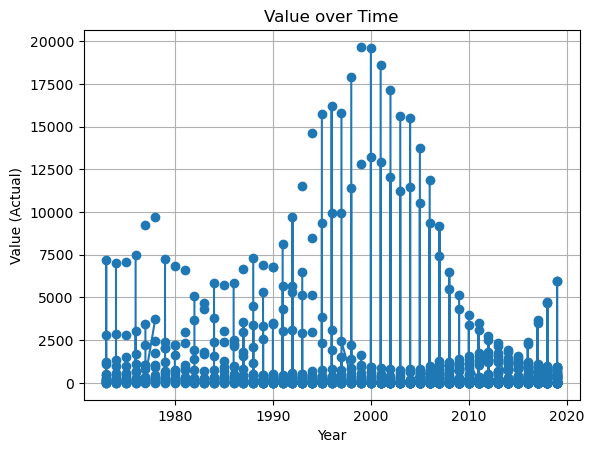

In [16]:
plt.plot(df_sorted["Year"],df_sorted["Value (Actual)"], marker = "o")
plt.title("Value over Time")
plt.xlabel("Year")
plt.ylabel("Value (Actual)")
plt.grid(True)
plt.show()

In [17]:
df.groupby("Format")["Value (Actual)"].sum()

Format
8 - Track                              30159.456658
CD                                    525411.020874
CD Single                               4353.296903
Cassette                              157208.102797
Cassette Single                         7227.226130
DVD Audio                                153.856707
Download Album                         25107.065340
Download Music Video                     724.891335
Download Single                        45894.155285
Kiosk                                    127.936032
LP/EP                                 127648.807493
Limited Tier Paid Subscription          4919.177543
Music Video (Physical)                 18437.062493
On-Demand Streaming (Ad-Supported)      8136.506182
Other Ad-Supported Streaming            1712.156423
Other Digital                            152.970122
Other Tapes                              280.680841
Paid Subscription                      42514.172158
Paid Subscriptions                       351.436772
Ringt

In [18]:
df.groupby("Metric")["Value (Actual)"].max()

Metric
Units                1402.739373
Value               13214.500000
Value (Adjusted)    19667.327786
Name: Value (Actual), dtype: float64

In [19]:
df.groupby(["Year","Format"])["Value (Actual)"].mean()

Year  Format                     
1973  8 - Track                      1131.893941
      CD                                     NaN
      CD Single                              NaN
      Cassette                        176.203694
      Cassette Single                        NaN
                                        ...     
2019  Ringtones & Ringbacks            17.153081
      SACD                              0.294753
      SoundExchange Distributions     908.200000
      Synchronization                 276.262360
      Vinyl Single                      4.642671
Name: Value (Actual), Length: 1128, dtype: float64

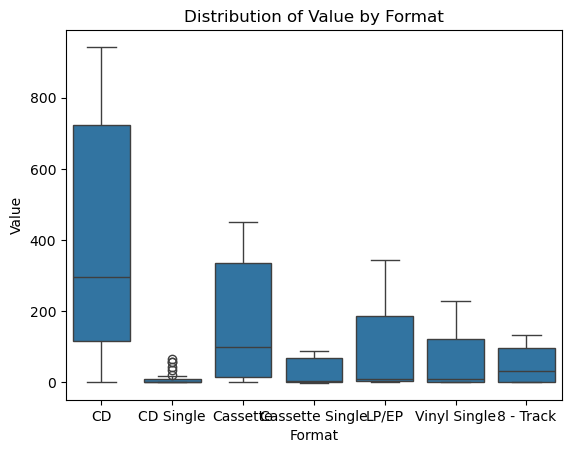

In [20]:
sns.boxplot(x="Format", y="Value (Actual)", data=df.head(300))
plt.title("Distribution of Value by Format")
plt.xlabel("Format")
plt.ylabel("Value")
plt.show()

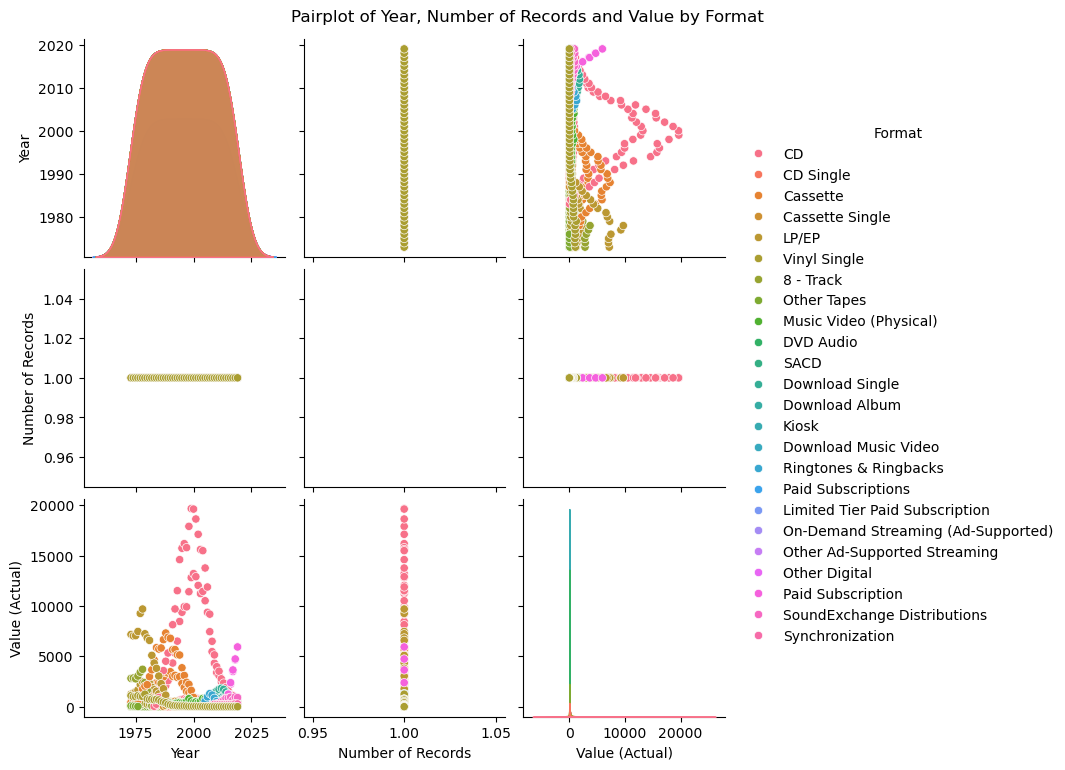

In [21]:
sns.pairplot(df, vars=["Year","Number of Records","Value (Actual)"], hue="Format")
plt.suptitle("Pairplot of Year, Number of Records and Value by Format", y = 1.02)
plt.show()

In [25]:
year_metric_sum = df.groupby(["Year","Metric"])["Value (Actual)"].sum().unstack()

In [26]:
year_metric_sum

Metric,Units,Value,Value (Adjusted)
Year,,,
1973,616.200000,2016.600000,11611.664555
1974,593.900000,2199.700000,11407.073082
1975,533.300000,2388.500000,11350.125362
1976,591.600000,2737.100000,12298.045250
1977,698.200000,3500.800000,14769.043326
1978,726.200000,4131.400000,16199.713647
1979,682.800000,3675.500000,12943.075806
1980,649.000000,3682.000000,11423.896529
1981,623.900000,3973.900000,11176.626538


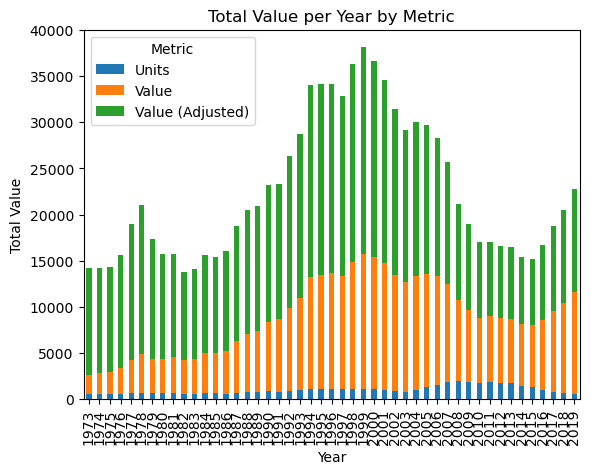

In [27]:
year_metric_sum.plot(kind = "bar", stacked = True)
plt.title("Total Value per Year by Metric")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.show()

In [28]:
format_year_avg = df.groupby(["Format","Year"])["Value (Actual)"].mean().head(200).unstack()

In [30]:
format_year_avg.T

Format,8 - Track,CD,CD Single,Cassette,Cassette Single
Year,,,,,
1973,1131.893941,NaN,NaN,176.203694,NaN
1974,1164.636203,NaN,NaN,184.898853,NaN
1975,1149.336499,NaN,NaN,194.832166,NaN
1976,1277.171924,NaN,NaN,274.047890,NaN
1977,1453.238762,NaN,NaN,446.501030,NaN
1978,1599.607137,NaN,NaN,758.273203,NaN
1979,1065.441897,NaN,NaN,901.217237,NaN
1980,749.029284,NaN,NaN,997.118871,NaN
1981,414.438361,NaN,NaN,1391.977923,NaN


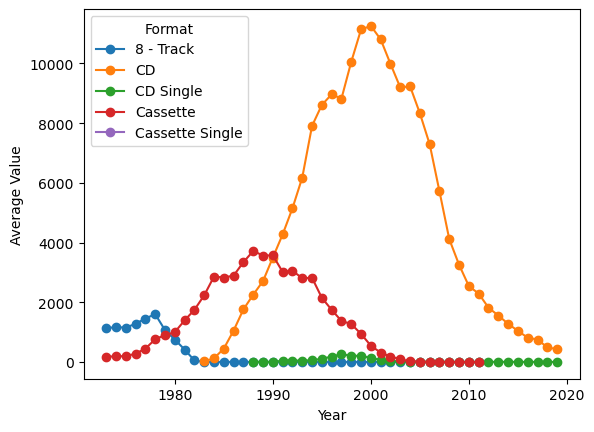

In [31]:
format_year_avg.T.plot(marker = "o")
plt.ylabel("Average Value")
plt.xlabel("Year")
plt.show()